In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data
data = pd.read_csv('data\\FinalData.csv')

In [8]:
features = data.drop(columns=['Total', 'Final', 'Grade'])
features

,Homework,Project,Quiz,Exam
0,98.333333,95.0,97.5,100.0
1,81.166667,0.0,95.0,96.0
2,80.333333,0.0,97.5,90.0
3,70.833333,40.0,73.0,60.0
4,86.250000,90.0,86.0,90.0
...,...,...,...,...
145,80.833333,30.0,65.5,77.5
146,82.083333,85.0,72.0,41.0
147,87.500000,80.0,83.0,72.0
148,90.000000,90.0,93.0,90.5


In [4]:
y = data['Final']
y

0      98.934091
1      79.271818
2      40.508182
3      53.681818
4      88.502273
         ...    
145    70.512879
146    49.224242
147    62.769697
148    92.381970
149    69.924242
Name: Final, Length: 150, dtype: float64

In [39]:
# Adding a column of ones to the features
x = []
for i in range(0, len(features)):
    x.append([1] + features.iloc[i].values.tolist())
x = np.array(x)

# Transposing the features
x_transpose = x.transpose()

In [41]:
# B = (X^T * X)^-1 * X^T * Y
xtx = np.matmul(x_transpose, x)
xtx_inv = np.linalg.inv(xtx)
xty = np.matmul(x_transpose, y)

# Array of the coefficients
    # B[0] = Intercept
    # B[1] = Homework
    # B[2] = Project
    # B[3] = Quiz
    # B[4] = Exam
B = np.matmul(xtx_inv, xty)
B

array([-11.05170591,   0.12912058,   0.24003527,   0.3645488 ,
         0.3574279 ])

In [81]:
# Initialize the Variables

# hw = input('Enter the homework average: ').replace(',', '.')
# proj = input('Enter the project average: ').replace(',', '.')
# quiz = input('Enter the quiz average: ').replace(',', '.')
# exam = input('Enter the exam grade: ').replace(',', '.')

hw = 100.0
proj = 100.0
quiz = 100.0
exam = 100.0

In [82]:
# Predict with Multiple Linear Regression
final = B[0] + B[1] * hw + B[2] * proj + B[3] * quiz + B[4] * exam

# Convert to letter grade
grade = 'A' if final >= 90 else 'B' if final >= 80 else 'C' if final >= 70 else 'D' if final >= 60 else 'F'
print(f'\nPredicted Final with Multiple Linear Regression: {final:.2f} ({grade})')


Predicted Final with Multiple Linear Regression: 98.06 (A)


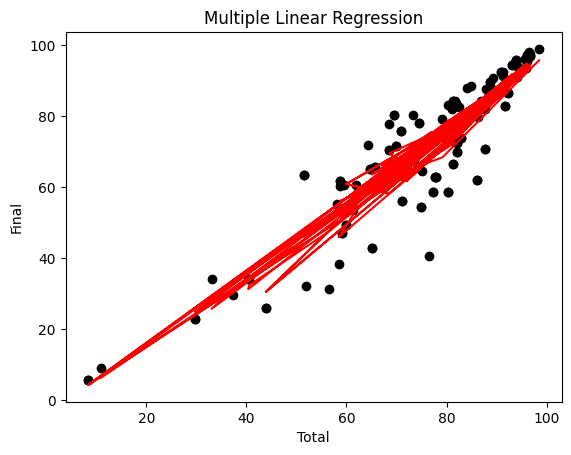

In [53]:
# Plot Line of Best Fit
plt.scatter(data['Total'], y, color='black')
plt.plot(data['Total'], B[0] + B[1] * data['Homework'] + B[2] * data['Project'] + B[3] * data['Quiz'] + B[4] * data['Exam'], color='red')
plt.title('Multiple Linear Regression')
plt.xlabel('Total')
plt.ylabel('Final')
plt.show()
